In [1]:
import datetime
import time
import os
# Import libraries use for visualization and analysis
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import cufflinks as cf

from monascaclient import client
from monascaclient import ksclient


from pandas import Series,DataFrame

import math
from __future__ import division

# Import library to execute remote commands for monasca-agent demo
import spur
import matplotlib.pyplot as plt
import seaborn as sns

import time as t
import datetime as dt

## 1 - Authentication 

In [2]:
KEYSTONE_URL = 'http://157.159.232.218:35357/v3/'
PROJECT_NAME = 'mini-mon'
USERNAME = 'mini-mon'
PASSWORD = 'password'

In [3]:
api_version = '2_0'
monasca_url = 'http://157.159.232.217:8070/v2.0/'
# Authenticate to Keystone
keystone_url = 'http://157.159.232.218:35357/v3/'

ks = ksclient.KSClient(auth_url=KEYSTONE_URL, username=USERNAME, password=PASSWORD)
#ks = ksclient.KSClient(auth_url=keystone_url, username='mini-mon', password='password')
    # construct the mon client
monasca_client = client.Client(api_version, monasca_url, token=ks.token)



# Initialize environment variables to use the Monasca CLI
%env OS_PROJECT_NAME=$PROJECT_NAME
%env OS_PASSWORD=$PASSWORD
%env OS_AUTH_URL=$KEYSTONE_URL
%env OS_USERNAME=$USERNAME
#%env OS_TEST="test"

env: OS_PROJECT_NAME=mini-mon
env: OS_PASSWORD=password
env: OS_AUTH_URL=http://157.159.232.218:35357/v3/
env: OS_USERNAME=mini-mon


In [4]:


# getting the metrics information
def get_metrics(names=[None], dimensions={}, limit=25):
    metrics = []
    for name in names:
        # Invoke the Monasca client
        metrics = metrics + monasca_client.metrics.list(name=name, dimensions=dimensions,limit=limit)
    return metrics

# function get measurements
def get_measurements(metrics, start_time = None, end_time = None, limit=None):
    measurements = []

    if start_time == None:
        start_date = datetime.datetime.utcnow() - datetime.timedelta(seconds=3600)
        start_time = start_date.strftime("%Y-%m-%dT%H:%M:%SZ")

    if end_time == None:
        end_date = datetime.datetime.utcnow() - datetime.timedelta(seconds=0)
        end_time = end_date.strftime("%Y-%m-%dT%H:%M:%SZ")

    for metric in metrics:
        # Invoke the Monasca client
        measurements.append(monasca_client.metrics.list_measurements(
                name=metric['name'],
                dimensions=metric['dimensions'],
                start_time=start_time,
                end_time=end_time))

    return measurements





def df_from_measurements2(raw, group):
    i=0
    log=0;
    df = pd.DataFrame()
    for s in raw:
        if s[0]['measurements'] and s[0]['dimensions']['hostname'] == group:
            m = np.array(s[0]['measurements'])
            timestamps = m[:, s[0]['columns'].index('timestamp')]
            df = pd.DataFrame(index = timestamps)
            break;
    m=0;
    for measure in raw:
        if measure[0]['measurements'] and measure[0]['dimensions']['hostname'] == group:
            hostname=group
            m = np.array(measure[0]['measurements'])
            timestamps = m[:, measure[0]['columns'].index('timestamp')]
            #df = pd.DataFrame(index = timestamps)
            #getting name
            if(log==1):
                print 'metric : \n'
                print measure[0]['name']
            name = measure[0]['name'];
            #getting dimensions
            if(log==1):
                print '\n Machine name : \n'
                print measure[0]['dimensions']['hostname']
            # Getting measurement
            if(log==1):
                print '\n measurements \n'
                print m#measure[0]['measurements']

            # Measurement into Array

            m = np.array(measure[0]['measurements'])


            timestamps = m[:, measure[0]['columns'].index('timestamp')]
            if(log==1):
                print timestamps


            values=m[:, measure[0]['columns'].index('value')]
            if(log==1):
                print '\n values \n '
                print values

            #vars()["df_"+str(i)] =  dict( zip( timestamps, m));

            df[name] = m[:, measure[0]['columns'].index('value')];

            if(log == 1):
                    print 'This is the dataframe'+'is'+name

            #vars()["df_"+str(i)]['hostname'] = hostname;

            if(log==1):
                print ' \n \n ***********  --------------- *********** \n'
            i=i+1;
    return df;








## 2 - Collecting the raw data 

In [5]:
#metrics = get_metrics(names=['load.avg_1_min']);
metrics = get_metrics(names=['net.out_packets_sec','cpu.idle_perc','cpu.stolen_perc','cpu.system_perc','cpu.wait_perc','disk.inode_used_perc','disk.space_used_perc','host_alive_status','http_status','io.read_kbytes_sec','io.read_req_sec','io.read_time_sec','io.write_kbytes_sec','io.write_req_sec','io.write_time_sec','load.avg_15_min','load.avg_1_min','load.avg_5_min','mem.free_mb','mem.total_mb','mem.usable_perc','mem.usable_mb','net.in_bytes_sec','net.in_errors_sec','net.in_packets_dropped_sec','net.in_packets_sec','net.out_bytes_sec','net.out_errors_sec','process.cpu_perc','process.mem.rss_mbytes']);
measurements = get_measurements(metrics,"2016-09-01T11:51:26.0Z","2016-09-01T11:53:26.0Z")

In [6]:
## Create a dynamic variable name 
i=0;
vars()["a"+str(i)]='jaafar';

In [7]:
raw = filter(None, measurements)
df_Ellis=df_from_measurements2(raw, 'ellis.jaafar.com')
df_Bono=df_from_measurements2(raw, 'ellis.jaafar.com')
df_Sprout=df_from_measurements2(raw, 'sprout.jaafar.com')
df_Homer=df_from_measurements2(raw, 'homer.jaafarbendriss.com')
df_Homestead=df_from_measurements2(raw, 'homestead.jaafarbendriss.com')
df_Ralf=df_from_measurements2(raw, 'ralf.jaafarbendriss.com')
df_ODL=df_from_measurements2(raw, 'Opendaylight')

## 3 - Presenting the data as DataFrames

In [8]:
# Replacing 0 with 1 for the percentages
df_Ellis = df_Ellis.replace(0,1)

In [9]:
df_Ellis

,cpu.idle_perc,cpu.stolen_perc,cpu.system_perc,cpu.wait_perc,io.read_kbytes_sec,io.read_req_sec,io.read_time_sec,io.write_kbytes_sec,io.write_req_sec,io.write_time_sec,load.avg_15_min,load.avg_1_min,load.avg_5_min,mem.free_mb,mem.total_mb,mem.usable_perc,mem.usable_mb
2016-09-01T11:51:54.758Z,85.5,1,0.4,13.5,1,1,1,139.733333,19.666667,0.633333,1.09,0.73,0.85,4895,7985,92.9,7419
2016-09-01T11:52:24.763Z,82.9,1,0.6,15.9,1,1,1,137.066667,19.400000,0.800000,1.12,1.23,0.96,4892,7985,92.9,7417
2016-09-01T11:52:54.791Z,82.9,1,0.5,16.0,1,1,1,135.600000,19.266667,0.700000,1.14,1.40,1.03,4895,7985,92.9,7419
2016-09-01T11:53:24.763Z,80.7,1,0.6,18.2,1,1,1,132.800000,18.700000,0.766667,1.15,1.50,1.09,4893,7985,92.9,7417


In [12]:
df_Bono = df_Bono.replace(0,1)

In [13]:
df_Sprout = df_Sprout.replace(0,1)

In [14]:
df_Homer = df_Homer.replace(0,1)

In [15]:
df_Homestead = df_Homestead.replace(0,1)

In [16]:
df_Ralf = df_Ralf.replace(0,1)

In [17]:
df_ODL = df_ODL.replace(0,1)

Recall :  What is  Time Series ? 


    As the name suggests, TS is a collection of data points collected at constant time intervals. These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis. But what makes a TS different from say a regular regression problem? There are 2 things:

    It is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
    Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.



## 4 - Preprocessing and Training 

In [18]:
!ls -l all*

-rw-rw-r-- 1 jaafar jaafar  2249 sept.  1 17:21 all_csv.csv
-rw-rw-r-- 1 jaafar jaafar  5337 sept.  1 21:17 all_metrics.txt
-rw-rw-r-- 1 jaafar jaafar 68541 sept.  1 13:07 all_metrics.txt.npy


In [19]:
df_ODL.columns
df_ODL.index

Index([u'2016-09-01T11:51:55.393Z', u'2016-09-01T11:52:25.389Z',
       u'2016-09-01T11:52:55.383Z', u'2016-09-01T11:53:25.394Z'],
      dtype='object')

In [20]:
df_Ellis.columns

Index([u'cpu.idle_perc', u'cpu.stolen_perc', u'cpu.system_perc',
       u'cpu.wait_perc', u'io.read_kbytes_sec', u'io.read_req_sec',
       u'io.read_time_sec', u'io.write_kbytes_sec', u'io.write_req_sec',
       u'io.write_time_sec', u'load.avg_15_min', u'load.avg_1_min',
       u'load.avg_5_min', u'mem.free_mb', u'mem.total_mb', u'mem.usable_perc',
       u'mem.usable_mb'],
      dtype='object')

In [21]:
df_Ellis['load.avg_1_min']

2016-09-01T11:51:54.758Z    0.73
2016-09-01T11:52:24.763Z    1.23
2016-09-01T11:52:54.791Z    1.40
2016-09-01T11:53:24.763Z    1.50
Name: load.avg_1_min, dtype: float64

In [22]:
DataFrame(df_Ellis,columns=['cpu.idle_perc','cpu.system_perc','cpu.wait_perc'])

,cpu.idle_perc,cpu.system_perc,cpu.wait_perc
2016-09-01T11:51:54.758Z,85.5,0.4,13.5
2016-09-01T11:52:24.763Z,82.9,0.6,15.9
2016-09-01T11:52:54.791Z,82.9,0.5,16.0
2016-09-01T11:53:24.763Z,80.7,0.6,18.2


In [23]:
df_Ellis.head(2)

,cpu.idle_perc,cpu.stolen_perc,cpu.system_perc,cpu.wait_perc,io.read_kbytes_sec,io.read_req_sec,io.read_time_sec,io.write_kbytes_sec,io.write_req_sec,io.write_time_sec,load.avg_15_min,load.avg_1_min,load.avg_5_min,mem.free_mb,mem.total_mb,mem.usable_perc,mem.usable_mb
2016-09-01T11:51:54.758Z,85.5,1,0.4,13.5,1,1,1,139.733333,19.666667,0.633333,1.09,0.73,0.85,4895,7985,92.9,7419
2016-09-01T11:52:24.763Z,82.9,1,0.6,15.9,1,1,1,137.066667,19.400000,0.800000,1.12,1.23,0.96,4892,7985,92.9,7417


In [10]:
# Compute a the percentage change of an array
def percentage_change(X):
    return [100.0 * a1/a2 - 100 for a1, a2 in zip(X[1:], X)]

X = [1,2,3];
X_perc = percentage_change(X)
X_perc,

([100.0, 50.0],)

In [11]:
#t.mktime(dt.datetime.strptime(repr(str(df_Ellis.index[4]))[1:-1], '%Y-%m-%dT%H:%M:%S.%fZ').timetuple())

In [12]:
# df in percentage
def perc_df(df):
    for i in range(len(df.columns)):
        metric_name = df.columns[i]
        df[metric_name] = np.append([1],percentage_change(df[metric_name].values))
        
        
    return df

In [13]:
def Timestamp(df):
    tsp = np.array(df.index)
    i=0;
    for ind in tsp:
        tsp[i] = t.mktime(dt.datetime.strptime(repr(str(ind))[1:-1], '%Y-%m-%dT%H:%M:%S.%fZ').timetuple())
        i += 1;
    return tsp



In [14]:
df_Ellis['Timestamp']=Timestamp(df_Ellis)
df_Ellis.index.names = [None]
df_Ellis = df_Ellis.reset_index(drop=True)
df_Ellis = df_Ellis.set_index('Timestamp')

df_Ellis

,cpu.idle_perc,cpu.stolen_perc,cpu.system_perc,cpu.wait_perc,io.read_kbytes_sec,io.read_req_sec,io.read_time_sec,io.write_kbytes_sec,io.write_req_sec,io.write_time_sec,load.avg_15_min,load.avg_1_min,load.avg_5_min,mem.free_mb,mem.total_mb,mem.usable_perc,mem.usable_mb
Timestamp,,,,,,,,,,,,,,,,,
1472723514,85.5,1,0.4,13.5,1,1,1,139.733333,19.666667,0.633333,1.09,0.73,0.85,4895,7985,92.9,7419
1472723544,82.9,1,0.6,15.9,1,1,1,137.066667,19.400000,0.800000,1.12,1.23,0.96,4892,7985,92.9,7417
1472723574,82.9,1,0.5,16.0,1,1,1,135.600000,19.266667,0.700000,1.14,1.40,1.03,4895,7985,92.9,7419
1472723604,80.7,1,0.6,18.2,1,1,1,132.800000,18.700000,0.766667,1.15,1.50,1.09,4893,7985,92.9,7417


In [15]:
perc_df(df_Ellis)


,cpu.idle_perc,cpu.stolen_perc,cpu.system_perc,cpu.wait_perc,io.read_kbytes_sec,io.read_req_sec,io.read_time_sec,io.write_kbytes_sec,io.write_req_sec,io.write_time_sec,load.avg_15_min,load.avg_1_min,load.avg_5_min,mem.free_mb,mem.total_mb,mem.usable_perc,mem.usable_mb
Timestamp,,,,,,,,,,,,,,,,,
1472723514,1.000000,1,1.000000,1.000000,1,1,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1,1.000000
1472723544,-3.040936,0,50.000000,17.777778,0,0,0,-1.908397,-1.355932,26.315789,2.752294,68.493151,12.941176,-0.061287,0,0,-0.026958
1472723574,0.000000,0,-16.666667,0.628931,0,0,0,-1.070039,-0.687285,-12.500000,1.785714,13.821138,7.291667,0.061325,0,0,0.026965
1472723604,-2.653800,0,20.000000,13.750000,0,0,0,-2.064897,-2.941176,9.523810,0.877193,7.142857,5.825243,-0.040858,0,0,-0.026958


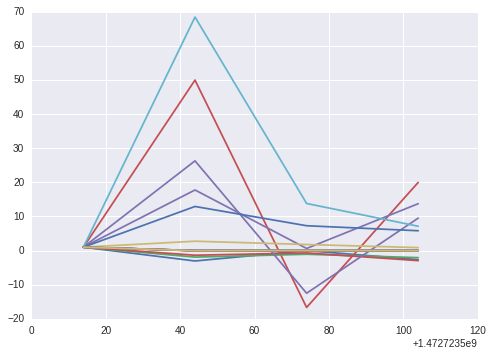

In [16]:
plt.plot(df_Ellis)

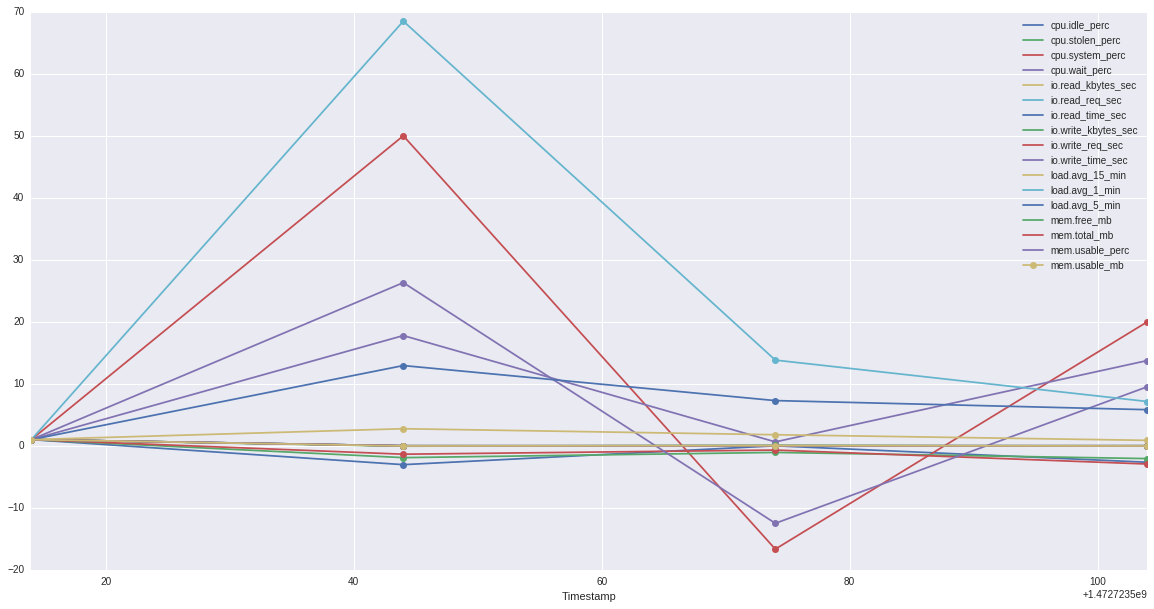

In [26]:

for metric_name in df_Ellis.columns:
        df_Ellis[metric_name].plot(table=False,figsize=(20,10),legend=True,linestyle='-',marker='o') 
    


In [ ]:
# Structuring data before the inputs
def structure_data(X,window,sel):
    if sel == 0:
        y = X[window:]
        y_l = [ [y[i]] for i in range(y.size) ]
        X_input =  np.resize(X,(X.size/window,window))
        X_l = X_input.tolist()
        return X_l,y_l,y
    else:
        y = X[step_size:]
        y_l = [ [y[i]] for i in range(y.size) ]
        X = X[:-st[i]ep_size]
        X_l = [ [X] for i in range(X.size) ]
        return X_l,y_l,y

In [170]:
M[0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.])

In [97]:
window = 3
step_size = 2
[X_vect,y_vect,y_arr] = structure_data(M[0],window,1)

In [84]:
M = df_Ellis.as_matrix()
M[0] # First line 
M[1] # Second line
len(M) # length of each column 
len(M[0]) # length of each line

17

In [140]:

M.itemset(i)

IndexError: index 140389876028640 is out of bounds for axis 0 with size 4

In [124]:
M[1]

array([ -3.04093567e+00,   0.00000000e+00,   5.00000000e+01,
         1.77777778e+01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -1.90839695e+00,  -1.35593220e+00,
         2.63157895e+01,   2.75229358e+00,   6.84931507e+01,
         1.29411765e+01,  -6.12870276e-02,   0.00000000e+00,
         0.00000000e+00,  -2.69578110e-02])

In [195]:
w

NameError: name 'w' is not defined

In [214]:
'''def to_vect(X,w):
    inputs = [[i for e in range(w)] for i in X[:-w]]
    targets = [[j for e in range(w)] for j in X[w:]]
    
    return inputs,targets'''

def to_vect(X,w):
    inputs = [[X[i+e] for e in range(w)] for i in range(len(X)-w)]
    targets = [[X[j+w]] for j in range(len(X)-w)]
    
    return inputs,targets

In [215]:
window = 2
to_vect(M[1],window)

([[-3.040935672514621, 0.0],
  [0.0, 50.0],
  [50.0, 17.777777777777771],
  [17.777777777777771, 0.0],
  [0.0, 0.0],
  [0.0, 0.0],
  [0.0, -1.9083969465648778],
  [-1.9083969465648778, -1.3559322033898411],
  [-1.3559322033898411, 26.31578947368422],
  [26.31578947368422, 2.7522935779816606],
  [2.7522935779816606, 68.493150684931521],
  [68.493150684931521, 12.941176470588232],
  [12.941176470588232, -0.061287027579169262],
  [-0.061287027579169262, 0.0],
  [0.0, 0.0]],
 [[50.0],
  [17.777777777777771],
  [0.0],
  [0.0],
  [0.0],
  [-1.9083969465648778],
  [-1.3559322033898411],
  [26.31578947368422],
  [2.7522935779816606],
  [68.493150684931521],
  [12.941176470588232],
  [-0.061287027579169262],
  [0.0],
  [0.0],
  [-0.026957811025738465]])

In [211]:
M[1]

array([ -3.04093567e+00,   0.00000000e+00,   5.00000000e+01,
         1.77777778e+01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -1.90839695e+00,  -1.35593220e+00,
         2.63157895e+01,   2.75229358e+00,   6.84931507e+01,
         1.29411765e+01,  -6.12870276e-02,   0.00000000e+00,
         0.00000000e+00,  -2.69578110e-02])

In [197]:
[inputs,targets] = to_vect(M[1],2)

In [199]:
from ann import ANN


nn = ANN([window,5,1], activation_fun='linear')


# Here please Try to represent the input data as percentage so that you can capture patterns

# train the ANN

nn.train(inputs,targets,1000)

(0, 1.3233475605467905e+69)
(100, nan)
(200, nan)
(300, nan)
(400, nan)
(500, nan)
(600, nan)
(700, nan)
(800, nan)
(900, nan)


## Start from Here the Evaluation

In [ ]:

 test 
Z = np.arange(100)
i = 0;
X = np.zeros(x.size)
for a in Z:
    X[i] = math.sin(a)
    i = i + 1;
X;

In [ ]:
v = np.asarray(df.valeur)

a = 10
X = v[1:a]
#X = X_mean[1:20];
df_slice = df[1:a];
df_slice;
X_mean = np.asarray(pd.rolling_mean(df_slice['valeur'],3))

In [ ]:
write_to_csv('jaafar.csv',df)

In [ ]:
#Plot the selected sub range in function of time 
tmps =np.arange(X.size)
plt.subplots(figsize=(30, 10))
plt.plot(tmps,X,color='indianred',alpha=0.5)

In [ ]:

 We'll use pct_change to find the percent change for each day
df_slice['perc_change'] = df_slice['valeur'].pct_change()
 Then we'll plot the daily return percentage
df_slice['valeur'].plot(figsize=(16,6),legend=True,linestyle='-',marker='o')

df_slice['perc_change'].plot(figsize=(16,6),legend=True,linestyle='-',marker='x')



In [ ]:
ma_pt = [2,10]

for ma in ma_pt:
    column_name = "MA for %s datapoint" %(str(ma))
    df_slice[column_name]=pd.rolling_mean(df_slice['valeur'],ma)


In [ ]:
df_slice[['valeur','MA for 10 datapoint']].plot(subplots=True,figsize=(20,5),)

In [ ]:
#[X_norm,normx,normy] = normalize(X)
X_norm = normalize(X)
X_perc = percentage_change(X)
X_rol_avg = rolling_avg(X,3)
X_norm.sum()

In [48]:
X_vect

NameError: name 'X_vect' is not defined

In [29]:
from ann import ANN

# 1,10,20,1 
nn = ANN([window,10,20,50,1], activation_fun='linear')


# Here please Try to represent the input data as percentage so that you can capture patterns

# train the ANN
#nn.train(inputs, targets, 1600)
nn.train(X_vect,y_vect,2000)

(0, 0.032006356537823057)
(100, 0.0005965361179953142)
(200, 0.00058663625061266915)
(300, 0.00057748846101036012)
(400, 0.00056896313037111876)
(500, 0.00056091101017261404)
(600, 0.00055331613532598424)
(700, 0.00054643946469980307)
(800, 0.00053990153062867985)
(900, 0.00053354498964821348)
(1000, 0.00052723298019614808)
(1100, 0.00052111202885737949)
(1200, 0.0005152539245524046)
(1300, 0.00050951039057905913)
(1400, 0.0005038463554174257)
(1500, 0.00049840052227748924)
(1600, 0.00049315780795524018)
(1700, 0.00048810481781842366)
(1800, 0.00048322964391144424)
(1900, 0.00047852169023628272)


In [30]:
pred = np.zeros(v.size);
for i in range(v.size):
    pred[i] = (v[i] + nn.predict([v[i]])[0]*v[i])
df['prediction'] = pred

In [32]:
#X = v[1:a]
h = get_prediction(X,1)

In [35]:
y_arr = np.asanyarray(y_vect)
h_arr = np.asanyarray(h)
error = (y_arr - y_arr)**2
y_arr;

In [53]:
'''X_mean = np.asarray(pd.rolling_mean(df_slice['valeur'],5))
y_arr_N;'''

h_out = recadrer(pred,window);

#plot(h,y_vect,100);

tmps = np.arange(100)
plt.subplots(figsize=(30, 10))
plt.plot(tmps,pred[100:200],'r-',v[100:200],'b--')


NameError: name 'recadrer' is not defined

In [107]:
#df.to_csv('data.csv',sep=';')
df = pd.read_csv('data.csv',sep=';');

In [108]:
cond = [ df.valeur.base > 6 ]
df['SLO_1 violation'] = cond[0][0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f570fa05a90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f570f539fd0>], dtype=object)

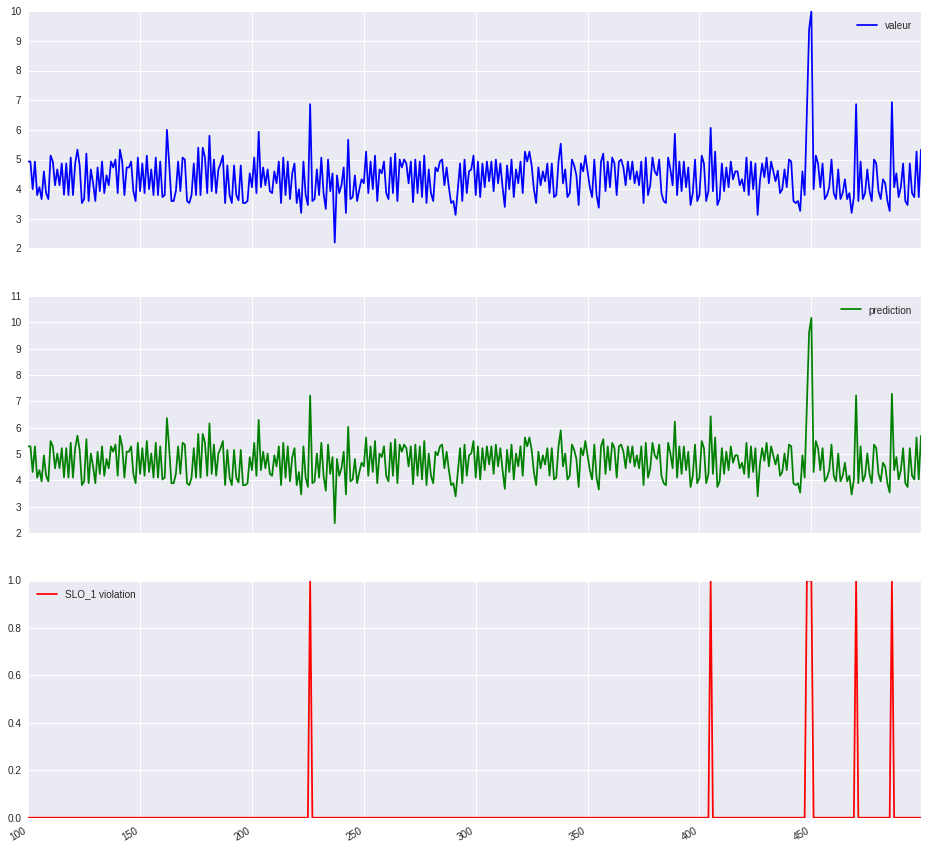

In [134]:
#df[['prediction','valeur']][1:10].plot(title="my title")
#sns.lmplot('time','valeur',df[1:20],scatter_kws={'marker':'o','color':'indianred'},fit_reg=False,line_kws={'linewidth':1,'color':'blue'})
#df[0:20].plot.scatter('time', 'valeur')
#df[0:20].plot.scatter('time', 'prediction')
'''subplots = False
df[1:10].plot('time','prediction',title="my title",kind='scatter',subplots=False)
df[1:10].plot('time','valeur',title="my title",kind='scatter',subplots=False)'''
'''df[1:100].valeur.plot(x_compat=True)
df[1:100].prediction.plot(secondary_y=True, style='*')'''
#del df['time']
df[100:500].plot(subplots=True,figsize=(16, 16),table=False)

In [94]:
g = sns.lmplot(x="time", y="valeur", col="day", hue="day",
...                data=tips, col_wrap=2, size=3)

NameError: name 'tips' is not defined

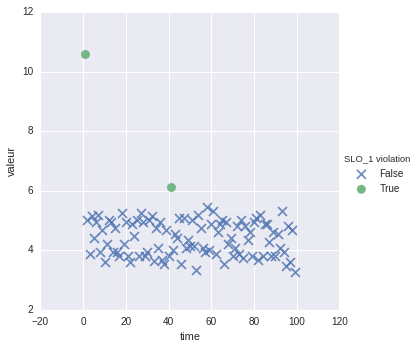

In [4]:
#df_slice[['valeur','prediction']].plot(subplots=False,figsize=(10,5),alpha=0.5)
sns.lmplot('time','valeur',df[1:100],fit_reg=False,hue='SLO_1 violation',robust=True,markers=['x','o'],ci=None, scatter_kws={"s": 80})

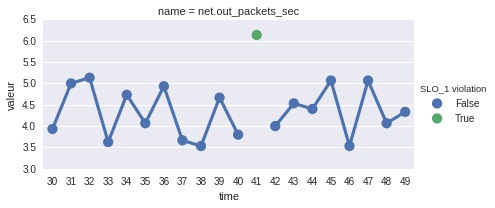

In [47]:
#df[['valeur','SLO_1 violation']][1:100].plot(subplots=False,figsize=(20,5))
sns.factorplot(data=df[30:50], x="time", y="valeur",col="name",hue="SLO_1 violation",size=3,aspect=2)